In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from __future__ import division

In [7]:
def create_dota_dataframe(matchDetailsList):
    
    '''
    Takes in list of match detail json strings and converts
    into a pandas dataframe for easier statistical manipulation
    '''

    playerID = []                 #initialize lists for stats of interest
    playerSlot = []
    playerKills = []
    playerDeaths = []
    playerAssists = []
    playerGPM = []
    playerXPM = []
    playerHeroDamage = []
    playerTowerDamage = []
    playerLevel = []
    playerHeroID = []
    gameWonStatus = []
    matchID = []
    matchLength = []
    matchCounter = []
    gameStartTime = []

    for match in matchDetailsList:    #construct lists
        for player in match['result']['players']:
            playerID.append(player['account_id'])
            playerSlot.append(player['player_slot'])
            playerKills.append(player['kills'])
            playerDeaths.append(player['deaths'])
            playerAssists.append(player['assists'])
            playerGPM.append(player['gold_per_min'])
            playerXPM.append(player['xp_per_min'])
            playerHeroDamage.append(player['hero_damage'])
            playerTowerDamage.append(player['tower_damage'])
            playerLevel.append(player['level'])
            playerHeroID.append(player['hero_id'])
            if ((player['player_slot'] == 0) or (player['player_slot'] == 1) or (player['player_slot'] == 2) or (player['player_slot'] == 3) or (player['player_slot'] == 4)) and match['result']['radiant_win'] == True:
                gameWonStatus.append(1)
            elif ((player['player_slot'] == 128) or (player['player_slot'] == 129) or (player['player_slot'] == 130) or (player['player_slot'] == 131) or (player['player_slot'] == 132)) and match['result']['radiant_win'] == False:
                gameWonStatus.append(1)
            else:
                gameWonStatus.append(0)
            matchID.append(match['result']['match_id'])
            matchLength.append(match['result']['duration'])
            matchCounter.append(1)
            gameStartTime.append(match['result']['start_time'])

    #construct dictionary to build data frame
    referenceDict = {'Player ID': playerID, 'Player Slot': playerSlot, 'Kills': playerKills, 'Deaths': playerDeaths, 'Assists': playerAssists, 'GPM': playerGPM, 'XPM': playerXPM, 'Hero Damage': playerHeroDamage, 'Tower Damage': playerTowerDamage, 'Level': playerLevel, 'Hero ID': playerHeroID, 'Win Y/N': gameWonStatus, 'Match ID': matchID, 'Match Length (s)': matchLength, 'Match Counter': matchCounter, 'Game Start Time': gameStartTime}
    dataFrameSummary = pd.DataFrame(data=referenceDict)

    return dataFrameSummary

In [8]:
def bin_win_rate(dataframe, numberbins):
    dfMin = dataframe['Match Length (s)'].min()
    dfMax = dataframe['Match Length (s)'].max()
    binlength = (dfMax-dfMin)/numberbins
    matchLength = []
    winRate = []
    
    for x in range (0, numberbins):
        matchLength.append(dfMin+binlength*(2*x+1)/2)
        tempDF = dataframe[dataframe['Match Length (s)']>(dfMin+x*binlength)]
        tempDF = tempDF [tempDF['Match Length (s)']<=(dfMin+(x+1)*binlength)]
        if tempDF['Match Counter'].sum() != 0:  
            winRate.append(tempDF['Win Y/N'].sum()/tempDF['Match Counter'].sum())
        else:
            winRate.append(0)
        
    return matchLength, winRate

In [9]:
with open('matchdetails.txt', 'r') as text:
    matchDetailsJSON = json.load(text)

In [10]:
dotaFrame = create_dota_dataframe(matchDetailsJSON)

In [11]:
dotaFrame.head(25)

,Assists,Deaths,GPM,Game Start Time,Hero Damage,Hero ID,Kills,Level,Match Counter,Match ID,Match Length (s),Player ID,Player Slot,Tower Damage,Win Y/N,XPM
0,12,4,647,1446086490,16174,106,14,15,1,1899269380,1501,4294967295,0,1962,1,530
1,13,5,350,1446086490,5367,100,3,11,1,1899269380,1501,102827045,1,517,1,297
2,15,5,342,1446086490,4030,91,1,12,1,1899269380,1501,4294967295,2,737,1,333
3,12,3,642,1446086490,17456,63,14,15,1,1899269380,1501,86811043,3,5782,1,500
4,14,4,432,1446086490,7441,29,3,12,1,1899269380,1501,44039249,4,1155,1,354
5,8,3,382,1446086490,4408,1,1,14,1,1899269380,1501,46667982,128,71,0,451
6,6,8,204,1446086490,7542,2,4,10,1,1899269380,1501,47067153,129,0,0,235
7,6,6,364,1446086490,8517,6,7,12,1,1899269380,1501,86740711,130,0,0,338
8,7,12,260,1446086490,5732,97,4,11,1,1899269380,1501,30999748,131,0,0,268
9,10,6,239,1446086490,6242,71,4,10,1,1899269380,1501,6289444,132,0,0,224


In [12]:
%matplotlib inline

In [13]:
chocoDotaFrame = dotaFrame[dotaFrame['Player ID']==46667982]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004F318320>]], dtype=object)

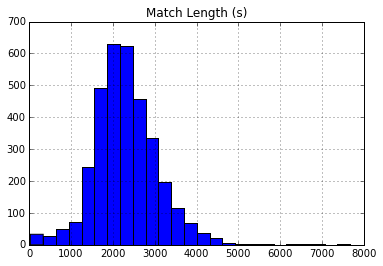

In [14]:
chocoDotaFrame.hist(column='Match Length (s)', bins=25)

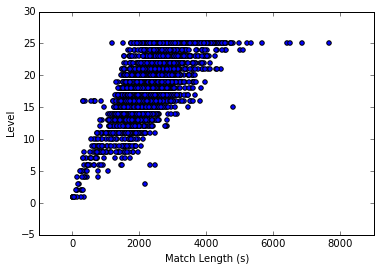

In [15]:
chocoDotaFrame.plot(x='Match Length (s)', y='Level', kind='scatter')

<Container object of 20 artists>

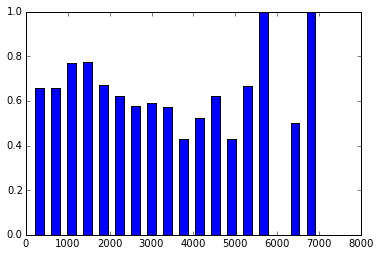

In [16]:
wr_x, wr_y = bin_win_rate(chocoDotaFrame,20)
plt.bar(wr_x, wr_y, width=200)

In [17]:
meepo = chocoDotaFrame[chocoDotaFrame['Hero ID']==82]

In [18]:
wr_x, wr_y = bin_win_rate(meepo, 10)

<Container object of 10 artists>

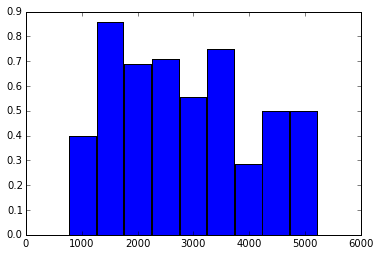

In [19]:
plt.bar(wr_x,wr_y,width=480)

<Container object of 10 artists>

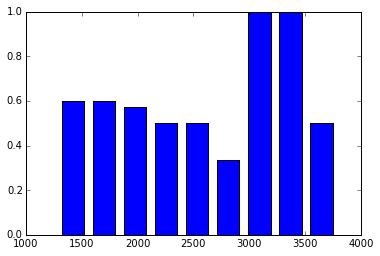

In [20]:
antimage = chocoDotaFrame[chocoDotaFrame['Hero ID']==1]
wr_x2, wr_y2 = bin_win_rate(antimage, 10)
plt.bar(wr_x2,wr_y2,width=200)

<Container object of 10 artists>

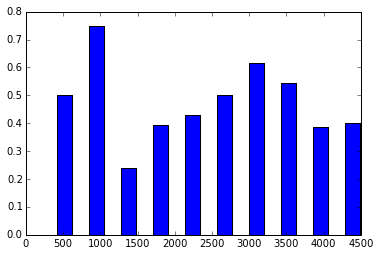

In [21]:
antimageAll = dotaFrame[dotaFrame['Hero ID']==1]
wr_x2, wr_y2 = bin_win_rate(antimageAll, 10)
plt.bar(wr_x2,wr_y2,width=200)

In [22]:
len(antimageAll)

354

<Container object of 10 artists>

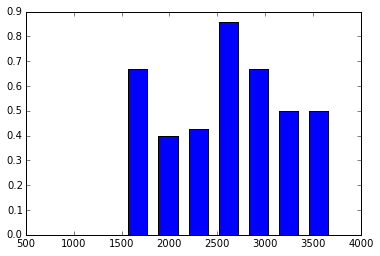

In [23]:
medusa = chocoDotaFrame[chocoDotaFrame['Hero ID']==94]
wr_x3, wr_y3 = bin_win_rate(medusa, 10)
plt.bar(wr_x3,wr_y3,width=200)

In [24]:
chen = chocoDotaFrame[chocoDotaFrame['Hero ID']==66]

In [25]:
wr_x3, wr_y3 = bin_win_rate(chen, 10)

<Container object of 10 artists>

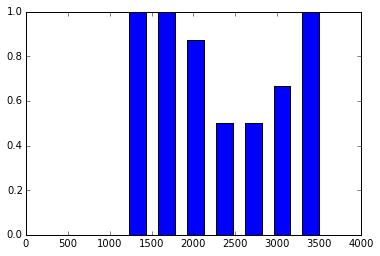

In [26]:
plt.bar(wr_x3,wr_y3,width=200)

In [27]:
chocoDotaFrame['Won Last Game Y/N'] = chocoDotaFrame['Win Y/N'].shift(1)

C:\Users\Brian\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
def morale_measurement(dataframe, playerID):
    
    moraleDF = dataframe[dataframe['Player ID']==playerID]
    moraleDF = moraleDF.sort(columns='Match ID')
    moraleDF['Won Last Game Y/N'] = moraleDF['Win Y/N'].shift(1)
    wonLastDF = moraleDF[moraleDF['Won Last Game Y/N']==1]
    lostLastDF = moraleDF[moraleDF['Won Last Game Y/N']==0]
    
    postWinWinRate = wonLastDF['Win Y/N'].sum()/wonLastDF['Match Counter'].sum()
    postLossWinRate = lostLastDF['Win Y/N'].sum()/lostLastDF['Match Counter'].sum()
    
    print(postWinWinRate)
    print(postLossWinRate)
    
    return moraleDF

In [30]:
moraleDF = morale_measurement(dotaFrame,playerID=30999748)

0.722054380665
0.689138576779


In [31]:
moraleDF = morale_measurement(dotaFrame,playerID=46667982)

0.643192488263
0.590202177294


In [32]:
wonLastDF = moraleDF[moraleDF['Won Last Game Y/N']==1]
lostLastDF = moraleDF[moraleDF['Won Last Game Y/N']==0]

In [33]:
wr_x, wr_y = bin_win_rate(wonLastDF,25)
wr_x2, wr_y2 = bin_win_rate(lostLastDF,25)

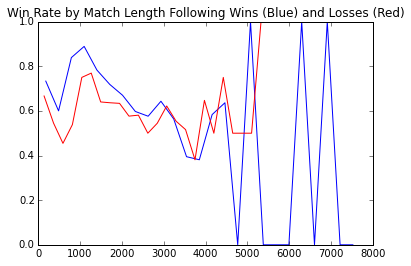

In [34]:
fig, ax = plt.subplots()
ax.plot(wr_x,wr_y,'b',wr_x2,wr_y2,'r')
ax.set_title('Win Rate by Match Length Following Wins (Blue) and Losses (Red)')


In [ ]:
ax.axis([0,5000,0,1])

In [ ]:
plt.plot(wr_x2,wr_y2)